In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from math import sqrt
import imageio
import numpy as np
from skimage.draw import circle, circle_perimeter,circle_perimeter_aa
from skimage import data
from skimage.feature import blob_log
from skimage.color import rgb2gray, label2rgb
# from skimage.measure import label, regionprops,find_contours
# from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu, difference_of_gaussians
from skimage.segmentation import active_contour 
# from scipy import ndimage as ndi


In [10]:
#############
# IMAGE
#############
img_stars = data.hubble_deep_field()[0:500, 0:500]
stars_gray = rgb2gray(img_stars)
rows_img = stars_gray.shape[0]
columns_img = stars_gray.shape[1]

# plt.imshow(stars_gray, cmap=plt.cm.gray)
# plt.axis('off')

Blob Detection. LoG

In [11]:
blobs_log = blob_log(stars_gray, min_sigma = 1, max_sigma=30, num_sigma=50, threshold=.1)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("Number of blobs counted : " ,numrows)

# fig, ax = plt.subplots(1, 1)
# #plt.imshow(stars_gray, cmap = plt.cm.gray)
# ax.imshow(stars_gray, cmap = plt.cm.gray)
# for blob in blobs_log:
#     y, x, r = blob
#     c = plt.Circle((x, y), r+2, color='lime', linewidth=1, fill=False)
#     ax.add_patch(c)
# plt.axis('off')
# print('c type{}, c {}'. format(type(c),c))

Number of blobs counted :  542


Active Contour (Snake) Segmentation.

Serpent1 type: <class 'numpy.ndarray'>. Size: (2, 3855)
Serpent2 type: <class 'tuple'>. Size: 2


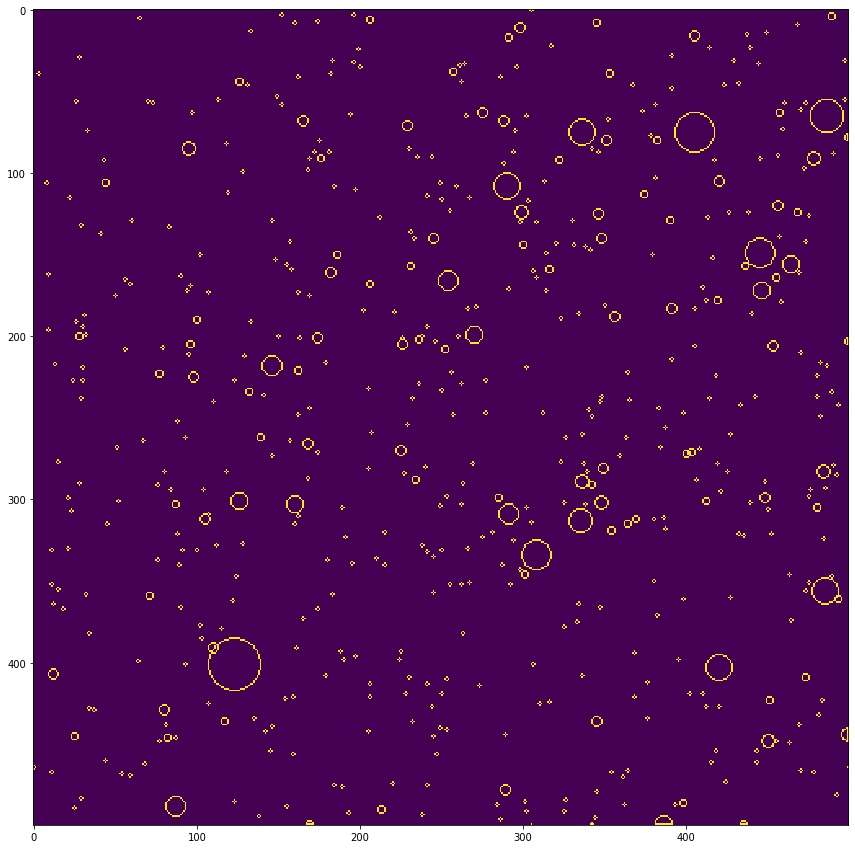

<Figure size 1080x1080 with 0 Axes>

In [22]:
#######CIRCLE/DISK

mask = np.zeros_like(stars_gray)
# print("coordinates rows: {}. coordinates columns: {}". format(row_snake,col_snake))
for blob in blobs_log:
    x, y, r = blob
    # print("Bloob coordinates " , blob)
    rr, cc  = circle_perimeter(int(x), int(y), int(r))
    rr[rr >= rows_img] = rows_img-1
    cc[cc >= columns_img] = columns_img-1        
#     print("coordinates rows: {}. coordinates columns: {}". format(rr,cc))
    mask[rr, cc] = 1

fig_c, ax_c = plt.subplots()
# ax_c.imshow(stars_gray, cmap=plt.cm.gray)
ax_c.imshow(mask)
plt.figure()
# n, bins, patches = plt.hist(blobs_log[:, 2])

serpent1 = np.nonzero(mask)
serpent2 = np.where(mask)
serpent1 = np.asarray(serpent1)
print("Serpent1 type: {}. Size: {}".format(type(serpent1),serpent1.shape))
print("Serpent2 type: {}. Size: {}".format(type(serpent2),len(serpent2)))

In [13]:
ser1 = np.array([serpent1[0], serpent1[1]]).T
ser2 = np.array([serpent2[0], serpent2[1]]).T
# fig, ax = plt.subplots()
# ax.plot(ser2[0], ser2[1], 'r', lw=3)

type(ser1)
ser1.shape
mask_toy=np.zeros_like(stars_gray)
mask_toy [rr,cc] = 1



# plt.imshow(mask_toy[40:60,110:140], cmap = plt.cm.gray)
# fig, ax = plt.subplots()
# ax.plot(rr, cc, '*r', lw=1)
# print('rr: {}, cc:{}'.format(rr,cc))
# init.shape

(3855, 2)

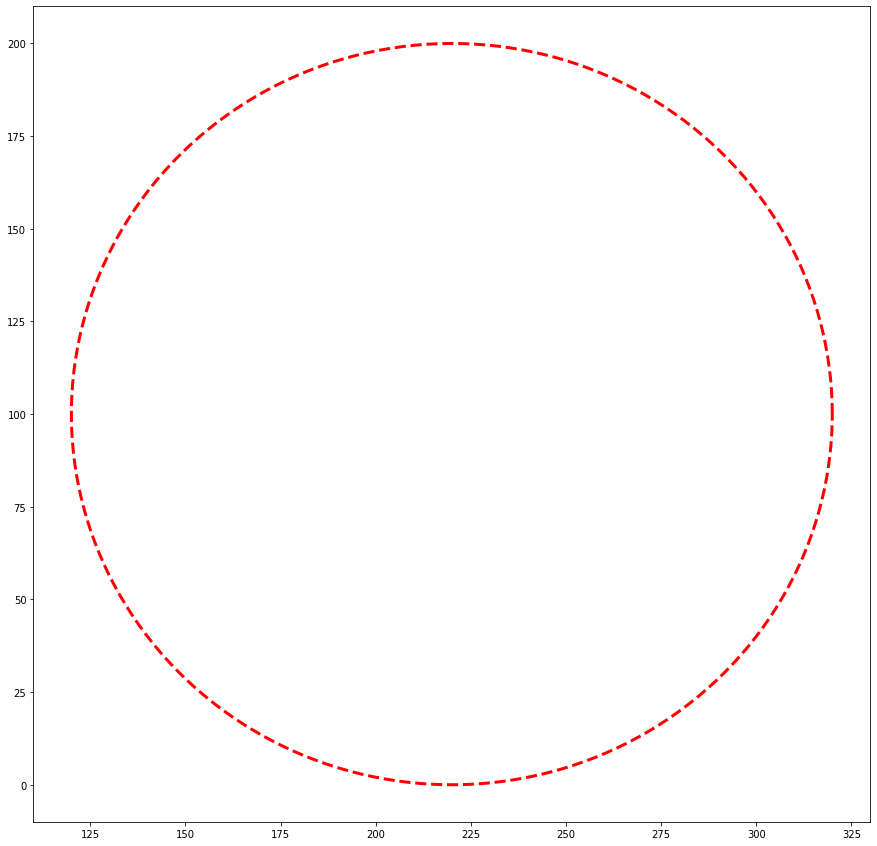

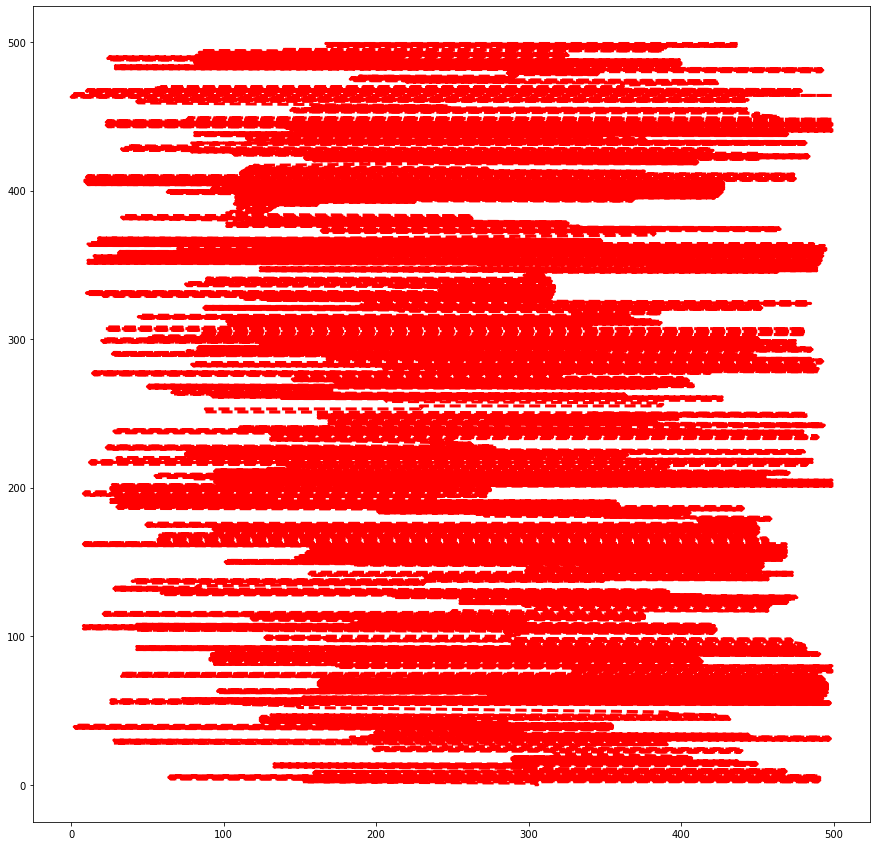

In [14]:
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = circle_perimeter(4, 4, 3)
img[rr, cc] = 1
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T
type(init)
fig, ax = plt.subplots()
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
init.shape

fig, ax = plt.subplots()
ax.plot(ser1[:, 1], ser1[:, 0], '--r', lw=3)
ser1.shape
# print("Serpent1 type: {}. Size: {}".format(type(img),len(img))
# ser1 = np.array([img[0], img[1]]).T
# ser_img = np.where(img)

# fig, ax = plt.subplots()
# ax.plot(ser_img[:,0], ser_img[:,1], 'r', lw=3)

In [15]:
type

type

In [16]:
print("Mask shape: {}, type: {}".format(mask.shape, type(mask)))
print("Mask serpent1: {}".format(ser1.shape))
print("Mask serpent2: {}".format(ser2.shape))

Mask shape: (500, 500), type: <class 'numpy.ndarray'>
Mask serpent1: (3855, 2)
Mask serpent2: (3855, 2)


In [17]:
stars_active = active_contour(stars_gray, ser1)


/home/ioastorga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


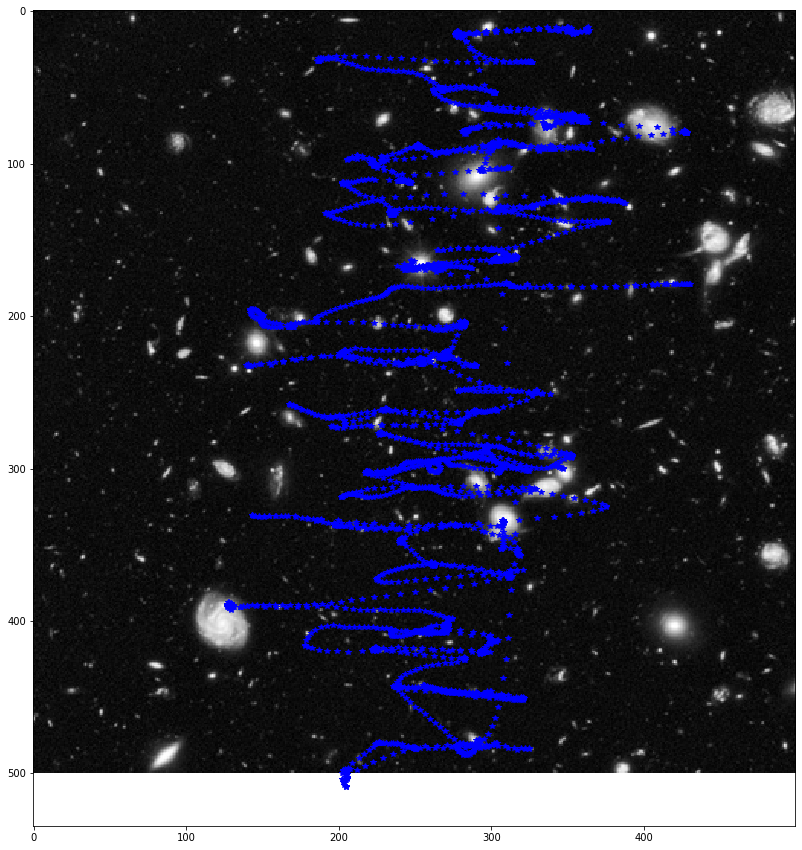

In [18]:
fig, ax = plt.subplots(1,1)
ax.imshow(stars_gray, cmap=plt.cm.gray)
# ax.plot(snake[:, 1], snake[:, 0], '--r', lw=3)
ax.plot(stars_active[:, 1], stars_active[:, 0], '*b', lw=3)


In [19]:
######CIRCLE/DISK
col_snake = np.empty((0,)*1, dtype=int)
row_snake = np.empty((0,)*1, dtype=int)
last_snake = np.empty((0,)*2, dtype=int)
# mask = np.zeros_like(stars_gray)
print("coordinates rows: {}. coordinates columns: {}". format(row_snake,col_snake))
for blob in blobs_log:
# for index, blob in enumerate(blobs_log,0):
    x, y, r = blob
    # print("Bloob coordinates " , blob)
    rr, cc  = circle_perimeter(int(x), int(y), int(r))
    rr[rr >= rows_img] = rows_img-1
    cc[cc >= columns_img] = columns_img-1
        
#     print("coordinates rows: {}. coordinates columns: {}". format(rr,cc))
    # mask[rr, cc] = 1
    row_snake = np.append(row_snake, rr)
    col_snake = np.append(col_snake, cc)
    
# plt.imshow(mask, cmap = plt.cm.gray)
# plt.figure()
# n, bins, patches = plt.hist(blobs_log[:, 2])
last_snake = np.array([rr,cc])
snake = np.array([col_snake, row_snake]).T
# snake_small = np.array([cc, rr]).T



coordinates rows: []. coordinates columns: []


In [20]:
# snake.shape
# snake[:3,1]
last_snake.ndim
last_snake

array([[ 47,  45,  47,  45,  46,  46,  46,  46],
       [131, 131, 131, 131, 132, 132, 130, 130]])

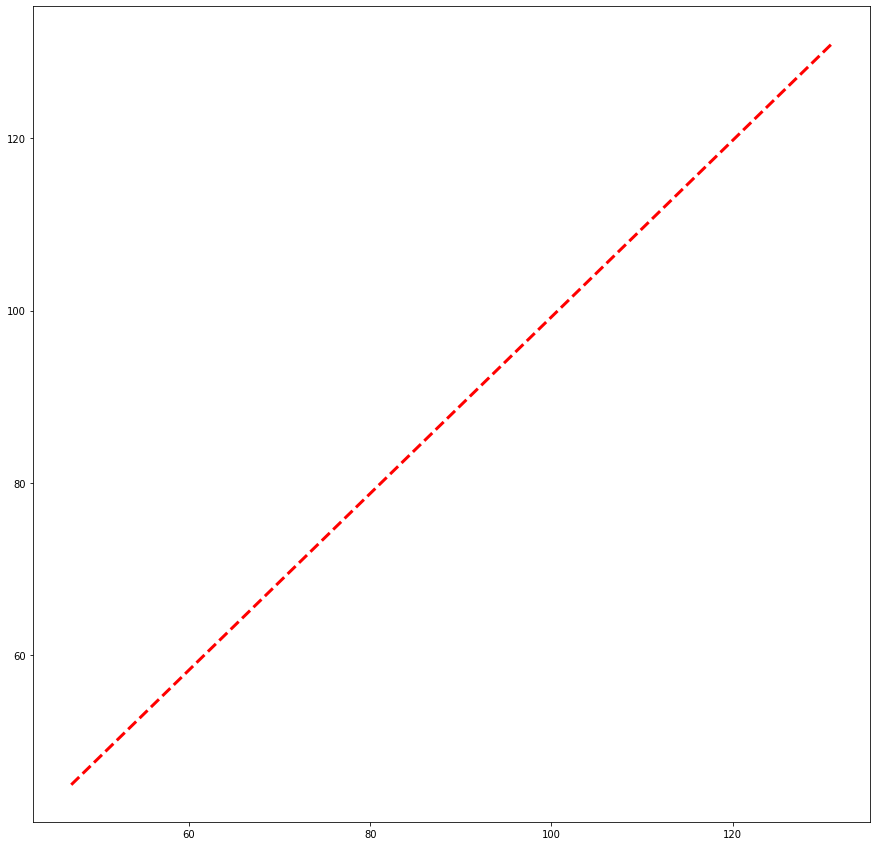

In [21]:

fig, ax = plt.subplots()
ax.plot(last_snake[:,0], last_snake[:,1], '--r', lw=3)
# ax.plot(snake[:,0], snake[:,1], '--r', lw=3)
# ax.plot(snake_small[:, 1], snake_small[:, 0], '--r', lw=3)

plt.show()
#############
#
#############
# snake = np.array([c, r]).T
# stars_active = active_contour(stars_gray, snake)
#
# fig, ax = plt.subplots(1,1)
# ax.imshow(stars_gray, cmap=plt.cm.gray)
# ax.plot(snake[:, 1], snake[:, 0], '--r', lw=3)
# ax.plot(stars_active[:, 1], stars_active[:, 0], '-b', lw=3)




Cannot form snake, still don't know if it can work with various circles at a time.